In [194]:
! mkdir "packages"

with open('packages/labeling.py', 'w') as file:
    file.write(
"""
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import json
import math

def get_detection(file_path,json_path):
    files = os.listdir(file_path)
    file_len = len(files)
    plt.figure(figsize=(14,12))

    for i in range(1,file_len+1):
        plt.subplot(math.ceil(file_len/2),2, i)
        image = mpimg.imread(file_path + "/" + files[i-1])
        with open(json_path + '/{}.json'.format(files[i-1][:5]), 'r+') as f:
            data = json.load(f)
            coor_1 = data['mark'][0]["coordinates"][0]
            coor_2 = data['mark'][0]["coordinates"][1]
            coor_3 = data['mark'][0]["coordinates"][2]
            coor_4 = data['mark'][0]["coordinates"][3]

        plt.imshow(image)
        plt.vlines(coor_1[0], coor_1[1], coor_4[1], color='r')
        plt.vlines(coor_2[0], coor_1[1], coor_3[1], color='r')
        plt.hlines(coor_4[1], coor_4[0], coor_3[0], color='r')
        plt.hlines(coor_2[1], coor_1[0], coor_3[0], color='r')

    plt.tight_layout()    
    plt.show() 
""")
    file.close()

mkdir: packages: File exists


In [204]:
with open('packages/labeling1.py', 'w') as file:
    file.write(
"""
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import json
import math

def get_detection(file_path,json_path):
    files = os.listdir(file_path)
    file_len = len(files)
    plt.figure(figsize=(14,12))

    for file in files:
        plt.subplot(math.ceil(file_len/2),2, files.index(file)+1)
        image = mpimg.imread(file_path + "/" + file)
        with open(json_path + '/{}.json'.format(file[:5]), 'r+') as f:
            data = json.load(f)
            coor_1 = data['mark'][0]["coordinates"][0]
            coor_2 = data['mark'][0]["coordinates"][1]
            coor_3 = data['mark'][0]["coordinates"][2]
            coor_4 = data['mark'][0]["coordinates"][3]

        plt.imshow(image)
        plt.vlines(coor_1[0], coor_1[1], coor_4[1], color='r')
        plt.vlines(coor_2[0], coor_1[1], coor_3[1], color='r')
        plt.hlines(coor_4[1], coor_4[0], coor_3[0], color='r')
        plt.hlines(coor_2[1], coor_1[0], coor_3[0], color='r')

    plt.tight_layout()    
    plt.show() 
""")
    file.close()

## img, json file path list 생성

### img file path

In [167]:
# indoor
in_file_path = ["./data/Multi-view_tracking_indoor/" + x + "/frames" for x in os.listdir("./data/Multi-view_tracking_indoor")]
in_file_path.remove('./data/Multi-view_tracking_indoor/.DS_Store/frames') # 이상한 경로 하나 삭제
# outdoor
out_file_path = ["./data/Multi-view_tracking_outdoor/" + x + "/frames" for x in os.listdir("./data/Multi-view_tracking_outdoor")]
out_file_path.remove('./data/Multi-view_tracking_outdoor/.DS_Store/frames')
# sum
file_path = in_file_path + out_file_path

In [168]:
file_pathes = [] # 최종 01,02 등등 파일마다의 path, get_detection의 첫 번째 argument

for path in file_path:
    length = len(os.listdir(path))
    for i in range(1,length+1):
        file_pathes.append(path + "/0{}".format(i))

### json file path

In [169]:
# indoor
in_json_path = ["./data/Multi-view_tracking_indoor/" + x + "/json/1-5" for x in os.listdir("./data/Multi-view_tracking_indoor")]
in_json_path.remove('./data/Multi-view_tracking_indoor/.DS_Store/json/1-5')

# outdoor
out_json_path = ["./data/Multi-view_tracking_outdoor/" + x + "/json/1-5" for x in os.listdir("./data/Multi-view_tracking_outdoor")]
out_json_path.remove('./data/Multi-view_tracking_outdoor/.DS_Store/json/1-5')
# sum
json_path = in_json_path + out_json_path

In [170]:
json_pathes = [] # 최종 01,02 등등 파일마다의 path, get_detection의 두 번째 argument

for path in json_path:
    length = len(os.listdir(path))
    for i in range(1,length+1):
        json_pathes.append(path + "/0{}".format(i))

## 위치 라벨링 되는지 봅시다

In [209]:
from packages import labeling1

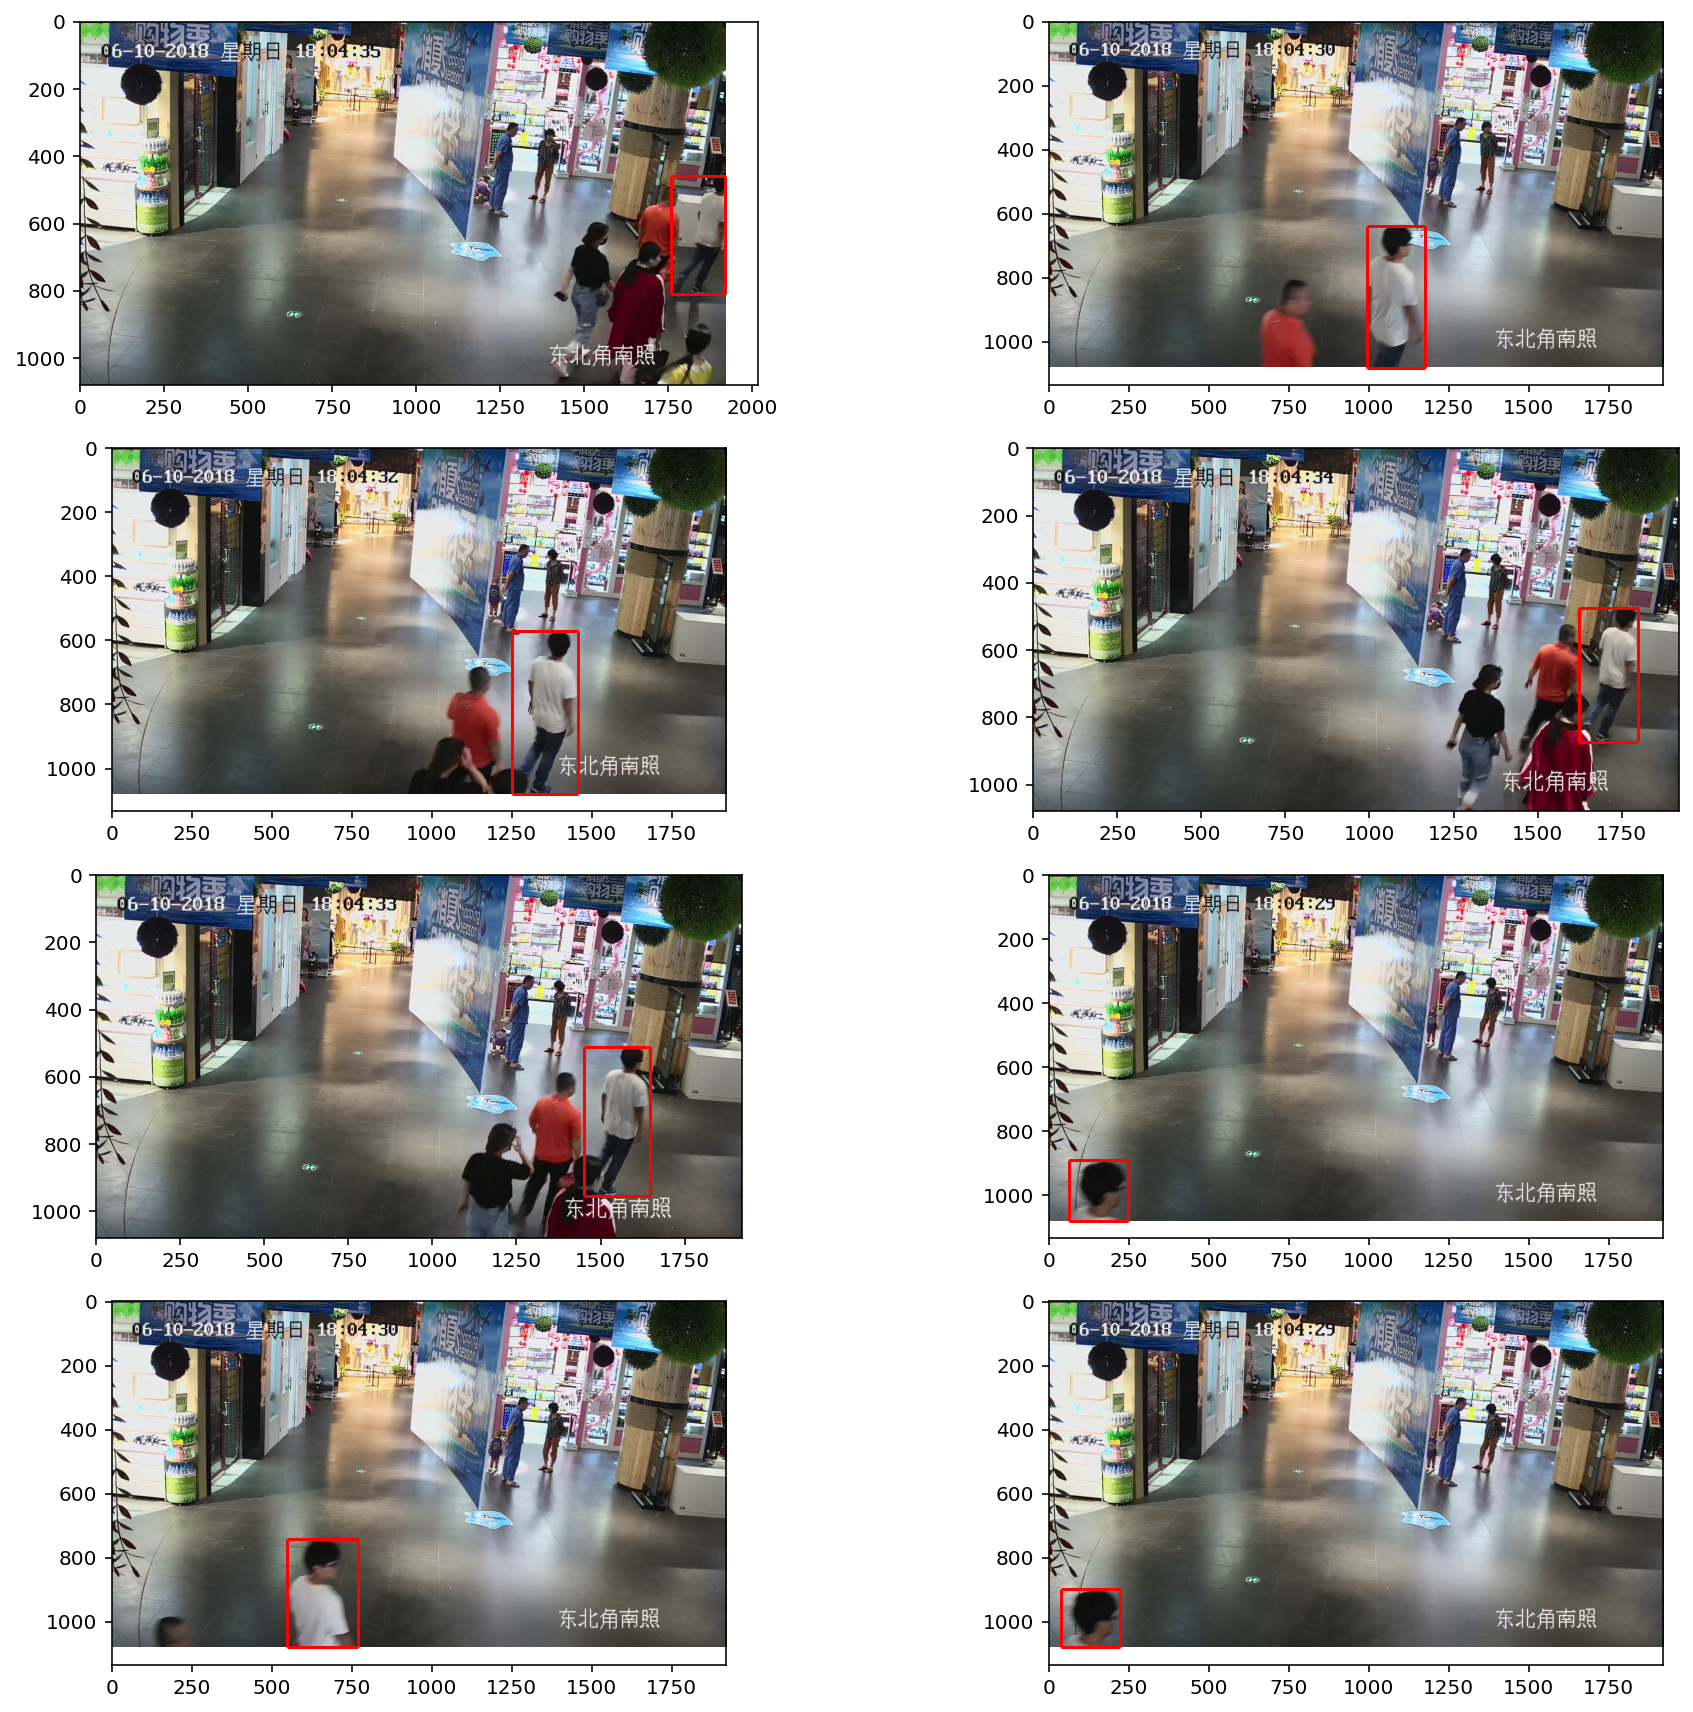

In [214]:
labeling1.get_detection(file_pathes[1], json_pathes[1])

## 딥파이 사용가능하게 xml 변환

In [ ]:
import os
import glob
datas = []
json_coordinates_df = pd.DataFrame()

# indoor
in_json_path = ["./data/Multi-view_tracking_indoor/" + x + "/json/1-5" for x in os.listdir("./data/Multi-view_tracking_indoor")]
try:
    in_json_path.remove('./data/Multi-view_tracking_indoor/.DS_Store/json/1-5')
except:
    pass

# outdoor
out_json_path = ["./data/Multi-view_tracking_outdoor/" + x + "/json/1-5" for x in os.listdir("./data/Multi-view_tracking_outdoor")]
try:
    out_json_path.remove('./data/Multi-view_tracking_outdoor/.DS_Store/json/1-5')
except:
    pass
# sum
json_path = in_json_path + out_json_path

json_pathes = [] # 최종 01,02 등등 파일마다의 path, get_detection의 두 번째 argument

for path in json_path:
    length = len(os.listdir(path))
    for i in range(1,length+1):
        json_pathes.append(path + "/0{}".format(i))
        
for each in json_pathes:
    files = sorted(glob.glob(each+"/*"))
    for file in files:
        with open(file) as f:
            data = json.load(f)
            co_ls = data['mark'][0]['coordinates']
            x_min = min([each[0] for each in co_ls])
            x_max = max([each[0] for each in co_ls])
            y_min = min([each[1] for each in co_ls])
            y_max = max([each[1] for each in co_ls])
            upper_folder = file.split('/')[3]
            file_name = file.split('/')[7]
        data = ({'upper_folder': upper_folder, 'file_name': file_name, 'x_min': x_min, 'x_max': x_max, 'y_min': y_min, 'y_max': y_max})
        datas.append(data)
json_coordinates_df= pd.DataFrame(datas)

In [ ]:
json_coordinates_df.to_csv('json_coordinates_df.csv', index=False)

In [224]:
xml_csv = pd.read_csv("./data/json_coordinates_df.csv")

In [223]:
def get_xml(a,b,c,d,e) :
    xml_text = '''<labels>
    <object>
        <name>{0}</name>
        <bndbox>
            <xmin>{1}</xmin>
            <ymin>{2}</ymin>
            <xmax>{3}</xmax>
            <ymax>{4}</ymax>
        </bndbox>
    </object>
'''.format(a,b,c,d,e)
    return xml_text

In [235]:
xml_csv["xml_text"] = ''

for idx in range(len(xml_csv)):
    xml_csv.loc[idx, "xml_text"] = get_xml(xml_csv.loc[idx,'file_name'], xml_csv.loc[idx,'x_min'], xml_csv.loc[idx,'y_min'], xml_csv.loc[idx,'x_max'], xml_csv.loc[idx,'y_max'])

In [ ]:
!mkdir ../Label

def save_xml(file_name,xml_text):
    with open('../Label/{}.xml'.format(file_name), 'w') as file:
        file.write(xml_text)
        file.close()

In [ ]:
for row in xml_csv.itertuples():
    save_xml(row.file_name, row.xml_text)

# jpg 모두 이름 변환 후 한 폴더로 옮겨주기

In [ ]:
import os
import glob

pwd_ = pwd
os.chdir(pwd_)
# indoor
in_frames_path = ["./data/Multi-view_tracking_indoor/" + x + "/frames/" for x in os.listdir("./data/Multi-view_tracking_indoor")]
try:
    in_frames_path.remove('./data/Multi-view_tracking_indoor/.DS_Store/frames/')
except:
    pass

# outdoor
out_frames_path = ["./data/Multi-view_tracking_outdoor/" + x + "/frames/" for x in os.listdir("./data/Multi-view_tracking_outdoor")]
try:
    out_frames_path.remove('./data/Multi-view_tracking_outdoor/.DS_Store/frames/')
except:
    pass
# sum
frames_path = in_frames_path + out_frames_path

frames_pathes = [] # 최종 01,02 등등 파일마다의 path, get_detection의 두 번째 argument

for path in frames_path:
    try:
        os.listdir(path).remove('.DS_Store')
    except:
        pass
    length = len(os.listdir(path))
    for i in range(1,length+1):
        frames_pathes.append(path + "0{}".format(i))

# 파일명 변경
for each in frames_pathes:
    try:
    os.chdir(pwd_+each[1:])
    except:
        continue
    for oldfile in glob.glob("*.jpg"):
        newfile = (each.split('/')[3]+each.split('/')[5]+oldfile)
        os.rename(oldfile, newfile)

In [ ]:
# 파일 하나의 디렉토리로 통일
import shutil

for each in frames_pathes:
    try:
        os.chdir(pwd_+each[1:])
    except:
        continue
    for file in glob.glob("*.jpg"):
        shutil.move(pwd_+each[1:]+'/'+file, '{}/data/frames/{}'.format(pwd_,file))

In [44]:
# 들어간 파일 갯수 확인
len(os.listdir(path))

3430

In [46]:
# 혹여 불필요한 파일이 디렉토리에 들어갔는지 확인 
path = pwd_ + '/data/frames'
os.listdir(path).index('.DS_Store')

ValueError: '.DS_Store' is not in list